# Import Modules

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Import Data

In [75]:
names = ["id", "title", "year", "rating", "votes", "length", "genres"] # Column names
data = pd.read_csv("imdb_top_10000.txt", sep="\t", names=names, index_col=0)

data

,title,year,rating,votes,length,genres
id,,,,,,
tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
...,...,...,...,...,...,...
tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama
tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance
tt0060880,The Quiller Memorandum (1966),1966,6.5,1356,104 mins.,Drama|Mystery|Thriller


# Plot Data

In [36]:
sns.set_style("darkgrid")

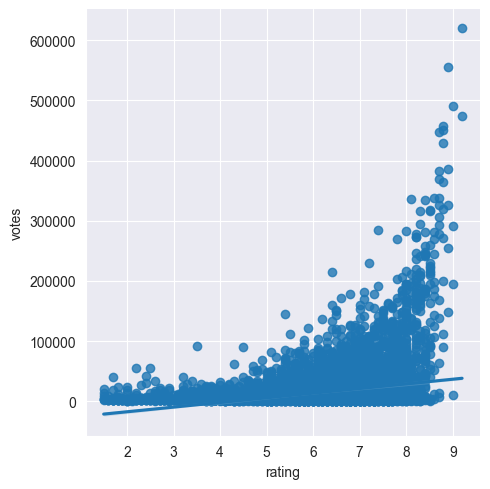

In [37]:
sns.lmplot(x="rating", y="votes", data=data)

<Axes: xlabel='rating', ylabel='votes'>

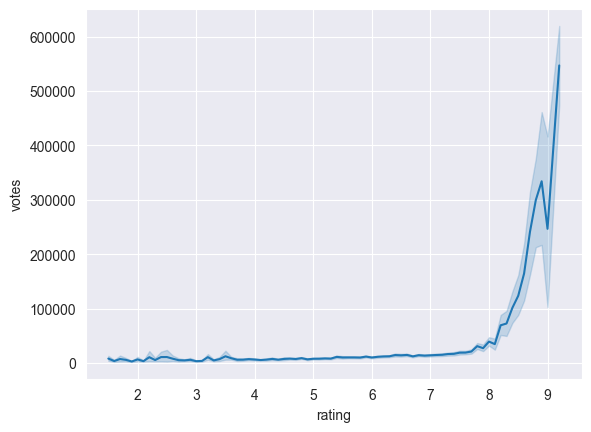

In [38]:
sns.lineplot(x="rating", y="votes", data=data)   

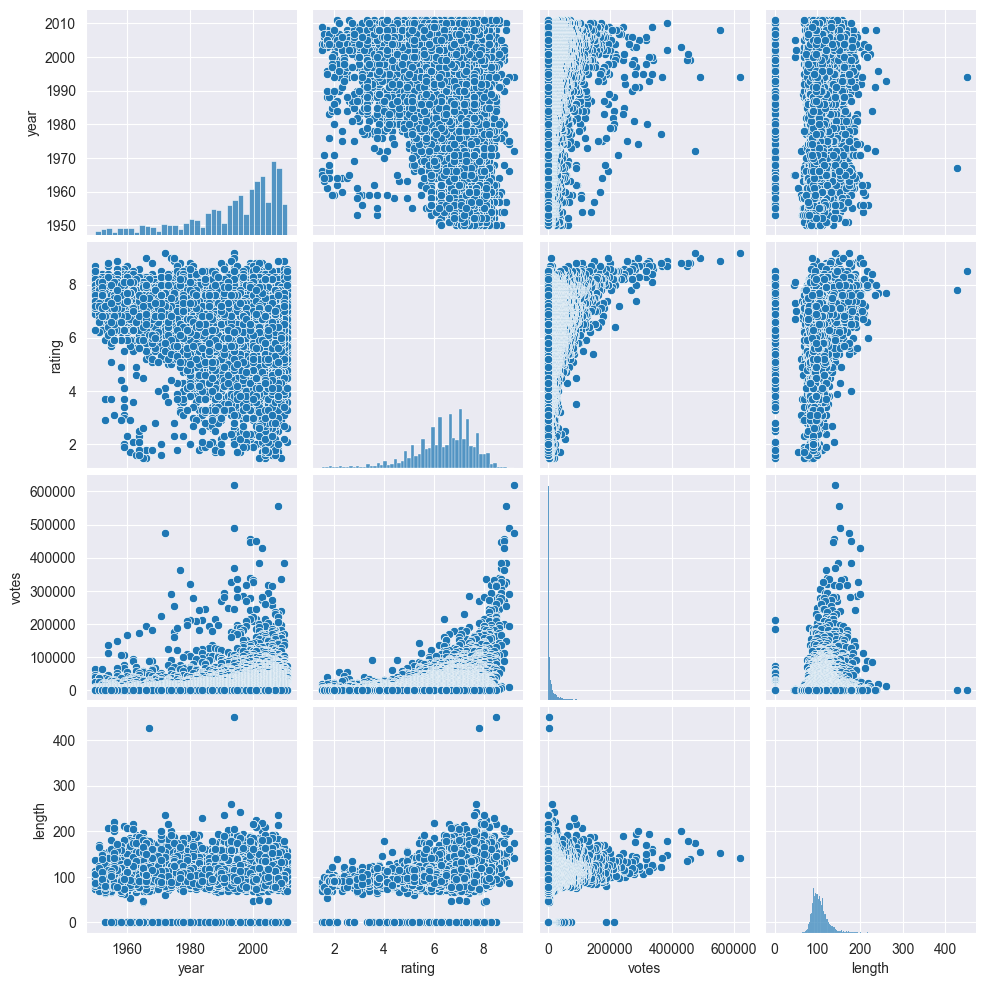

In [79]:
sns.pairplot(data)

# Ordinary Least Squares Regression

In [40]:
results = sm.OLS(data["rating"], data["votes"]).fit()

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   0.221
Model:                            OLS   Adj. R-squared (uncentered):              0.220
Method:                 Least Squares   F-statistic:                              2829.
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        23:10:11   Log-Likelihood:                         -31655.
No. Observations:               10000   AIC:                                  6.331e+04
Df Residuals:                    9999   BIC:                                  6.332e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
votes       7.956e-05    1.5e-06     53.190      0.000    7.66e-05    8.25e-05
==============================================================================
Omnibus:                     9919.237   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           762189.305
Skew:                          -4.757   Prob(JB):                         0.00
Kurtosis:                      44.698   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Advanced Data Selection

In [42]:
data[data["year"] > 1995]

,title,year,rating,votes,length,genres
id,,,,,,
tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
tt0169547,American Beauty (1999),1999,8.6,338332,122 mins.,Drama
tt0499549,Avatar (2009),2009,8.1,336855,162 mins.,Action|Adventure|Fantasy|Sci-Fi
...,...,...,...,...,...,...
tt0118635,Aprile (1998),1998,6.7,1358,78 mins.,Comedy
tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama
tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance


In [43]:
data[(data["year"] > 1995) & (data["year"] < 2000)].sort_values("rating", ascending=False).head(10)

,title,year,rating,votes,length,genres
id,,,,,,
tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
tt0120586,American History X (1998),1998,8.6,270082,119 mins.,Crime|Drama
tt0169547,American Beauty (1999),1999,8.6,338332,122 mins.,Drama
tt0118799,Life Is Beautiful (1997),1997,8.5,131578,116 mins.,Comedy|Drama|Romance|War
tt0120815,Saving Private Ryan (1998),1998,8.5,317912,169 mins.,Action|Drama|History|War
tt0119488,L.A. Confidential (1997),1997,8.4,187115,138 mins.,Crime|Drama|Mystery|Thriller
tt0119698,Princess Mononoke (1997),1997,8.4,77859,134 mins.,Animation|Adventure|Fantasy
tt0120689,The Green Mile (1999),1999,8.4,243660,189 mins.,Crime|Drama|Fantasy|Mystery


# Grouping Data

In [44]:
data.groupby("year")["rating"].mean()

year
1950    7.545161
1951    7.478125
1952    7.475676
1953    7.106383
1954    7.371795
          ...   
2007    6.303831
2008    6.275260
2009    6.287290
2010    6.340635
2011    6.357143
Name: rating, Length: 62, dtype: float64

In [45]:
data.groupby("year")["rating"].max()

year
1950    8.7
1951    8.3
1952    8.4
1953    8.3
1954    8.8
       ... 
2007    8.3
2008    8.9
2009    8.4
2010    8.9
2011    8.6
Name: rating, Length: 62, dtype: float64

In [46]:
data.groupby("year")["rating"].min()

year
1950    6.3
1951    6.2
1952    6.3
1953    2.9
1954    6.1
       ... 
2007    1.6
2008    1.7
2009    1.5
2010    2.2
2011    2.1
Name: rating, Length: 62, dtype: float64

# Plot with Grouping

In [47]:
data_year_against_rating = data.groupby("year")["rating"].mean().reset_index()

<Axes: xlabel='year', ylabel='rating'>

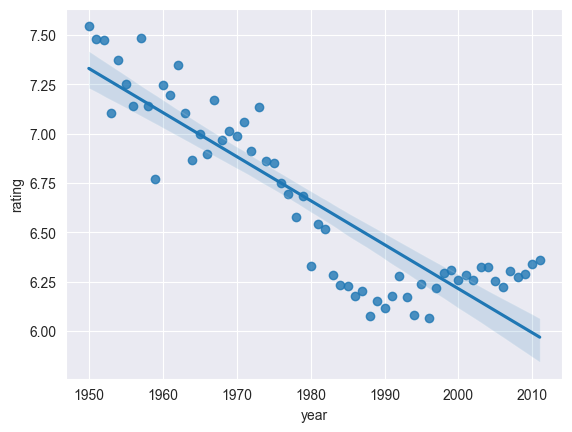

In [48]:
sns.regplot(x="year", y="rating", data=data_year_against_rating)

# Challenge Questions: 

1. What was the highest scoring movie in 1996?
2. In what year was the highest rated movie of all time made?
3. What five movies have the most votes ever?
4. What year in the 1960s had the highest average movie rating?

## 1. What was the highest scoring movie in 1996?

In [49]:
highest_movie_in_1996_score = data[(data["year"] == 1996)]["rating"].max()
highest_movie_in_1996 = data[(data["year"] == 1996) & (data["rating"] == highest_movie_in_1996_score)]

highest_movie_in_1996

,title,year,rating,votes,length,genres
id,,,,,,
tt0116282,Fargo (1996),1996,8.3,187498,98 mins.,Crime|Drama|Thriller
tt0116231,The Bandit (1996),1996,8.3,13288,121 mins.,Action|Crime|Drama|Romance|Thriller


## 2. In what year was the highest rated movie of all time made?

In [50]:
highest_rated_movie_ever = data[data["rating"] == data["rating"].max()]

highest_rated_movie_ever

,title,year,rating,votes,length,genres
id,,,,,,
tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
tt0068646,The Godfather (1972),1972,9.2,474189,175 mins.,Crime|Drama


## 3. What five movies have the most votes ever?

In [51]:
most_voted_movies = data.sort_values("votes", ascending=False).head(5)

most_voted_movies

,title,year,rating,votes,length,genres
id,,,,,,
tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
tt0468569,The Dark Knight (2008),2008,8.9,555122,152 mins.,Action|Crime|Drama|Thriller
tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
tt0068646,The Godfather (1972),1972,9.2,474189,175 mins.,Crime|Drama
tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller


## 4. What year in the 1960s had the highest average movie rating?

In [52]:
highest_avg_rated_movie_ratings = data.groupby("year")["rating"].mean().sort_values(ascending=False)

highest_avg_movie_rating_year_1960s = highest_avg_rated_movie_ratings[(highest_avg_rated_movie_ratings.index >= 1960) & (highest_avg_rated_movie_ratings.index < 1970)].head(1)

highest_avg_movie_rating_year_1960s

year
1962    7.349057
Name: rating, dtype: float64

# Clean Data

In [76]:
data["title"] = data["title"].str.split("(", expand=True)[0]
# The expand=True parameter is used to return a DataFrame instead of a Series

data

,title,year,rating,votes,length,genres
id,,,,,,
tt0111161,The Shawshank Redemption,1994,9.2,619479,142 mins.,Crime|Drama
tt0110912,Pulp Fiction,1994,9.0,490065,154 mins.,Crime|Thriller
tt0137523,Fight Club,1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
tt0133093,The Matrix,1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
tt1375666,Inception,2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
...,...,...,...,...,...,...
tt0807721,Meduzot,2007,7.0,1357,78 mins.,Drama
tt0339642,Daltry Calhoun,2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance
tt0060880,The Quiller Memorandum,1966,6.5,1356,104 mins.,Drama|Mystery|Thriller


In [77]:
data["length"] = data["length"].str.split(" ", expand=True)[0].astype(int)

data

,title,year,rating,votes,length,genres
id,,,,,,
tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama
tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller
tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller
tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi
tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller
...,...,...,...,...,...,...
tt0807721,Meduzot,2007,7.0,1357,78,Drama
tt0339642,Daltry Calhoun,2005,5.2,1357,100,Comedy|Drama|Music|Romance
tt0060880,The Quiller Memorandum,1966,6.5,1356,104,Drama|Mystery|Thriller


In [78]:
if data["genres"].str.contains("|").any():
    data["genres"] = data["genres"].str.split("|")

data

,title,year,rating,votes,length,genres
id,,,,,,
tt0111161,The Shawshank Redemption,1994,9.2,619479,142,"[Crime, Drama]"
tt0110912,Pulp Fiction,1994,9.0,490065,154,"[Crime, Thriller]"
tt0137523,Fight Club,1999,8.8,458173,139,"[Drama, Mystery, Thriller]"
tt0133093,The Matrix,1999,8.7,448114,136,"[Action, Adventure, Sci-Fi]"
tt1375666,Inception,2010,8.9,385149,148,"[Action, Adventure, Sci-Fi, Thriller]"
...,...,...,...,...,...,...
tt0807721,Meduzot,2007,7.0,1357,78,[Drama]
tt0339642,Daltry Calhoun,2005,5.2,1357,100,"[Comedy, Drama, Music, Romance]"
tt0060880,The Quiller Memorandum,1966,6.5,1356,104,"[Drama, Mystery, Thriller]"
